In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from  matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier


import seaborn as sns
from scipy import sparse
%matplotlib inline

In [2]:
news_data = pd.read_csv("News_Final.csv")

In [3]:
news_data = news_data[['Title','Headline','Topic','Facebook', 'GooglePlus', 'LinkedIn']].copy()
news_data.head()

,Title,Headline,Topic,Facebook,GooglePlus,LinkedIn
0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,obama,-1,-1,-1
1,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",economy,-1,-1,-1
2,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",economy,-1,-1,-1
3,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,economy,-1,-1,-1
4,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,economy,-1,-1,-1


In [4]:
news_data['popularity'] = ((news_data.Facebook) + (news_data.GooglePlus) + (news_data.LinkedIn)).astype(int)


In [5]:
news_data = news_data[news_data.popularity >= 0]

news_data = news_data[['Title','Headline', 'Topic','popularity']]
len(news_data)

84984

In [6]:

popularity = news_data['popularity'].values
pop_normalized = preprocessing.normalize([popularity])

In [7]:

pop_normalized.tolist()
# pop_normalized
se = pd.Series(pop_normalized[0])

news_data['popular'] = se.values

news_data.drop(['popularity'], axis = 1)

,Title,Headline,Topic,popular
6,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",palestine,0.000000
56,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0.000000
111,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0.000000
726,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,microsoft,0.000000
727,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",economy,0.000000
728,Economy to improve though no change in last 6 ...,"New Delhi, Nov 8 (IANS) Majority of Indian bus...",economy,0.000000
729,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,microsoft,0.000000
730,IDC predicts the emergence of ‘DX economy’,KUCHING: The global digital economy is about t...,economy,0.000005
731,Economic Preview: Whew! U.S. economy hasn’t go...,Seems the economy is doing fine after all. The...,economy,0.000141
732,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,microsoft,0.000034


Text(0.5,1,'popularity of news item ')

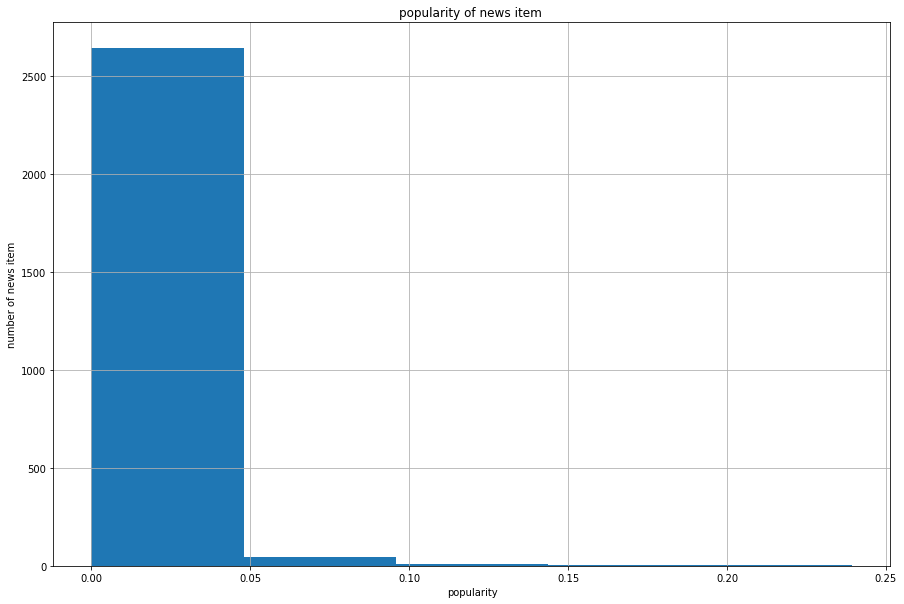

In [8]:
graph = news_data.groupby('popular')['Title'].count().reset_index()
plt.rcParams["figure.figsize"] = (15,10)
graph['popular'].hist(bins = 5)
plt.xlabel('popularity')
plt.ylabel('number of news item')
plt.title('popularity of news item ')
# plt.plot(graph['popular'])


In [9]:
news_data['Title'] = news_data['Title'].map(lambda x :x.rstrip('...'))


In [10]:
list = []
for i, row in news_data.iterrows():
   
    if(row['popular'] == 0):
        list.append(0) 
    elif(row['popular'] >= 0):
            list.append(1)

popular = pd.Series(list)

news_data['popularity'] = popular.values
news_data
# news_data['popularity'].astype(int)

,Title,Headline,Topic,popularity,popular
6,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",palestine,0,0.000000
56,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0,0.000000
111,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0,0.000000
726,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,microsoft,0,0.000000
727,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",economy,0,0.000000
728,Economy to improve though no change in last 6 ...,"New Delhi, Nov 8 (IANS) Majority of Indian bus...",economy,0,0.000000
729,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,microsoft,0,0.000000
730,IDC predicts the emergence of ‘DX economy’,KUCHING: The global digital economy is about t...,economy,1,0.000005
731,Economic Preview: Whew! U.S. economy hasn’t go...,Seems the economy is doing fine after all. The...,economy,1,0.000141
732,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,microsoft,1,0.000034


In [11]:
news_data = news_data.drop(['popular'],axis = 1)
news_data

,Title,Headline,Topic,popularity
6,"Monday, 29 Feb 2016","RAMALLAH, February 25, 2016 (WAFA) - Palestine...",palestine,0
56,"Monday, 29 Feb 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0
111,"Tuesday, 1 Mar 2016","RAMALLAH, February 29, 2016 (WAFA) - The Gover...",palestine,0
726,Microsoft offering £100 discount on original B...,Just ahead of the market rollout of Microsoft'...,microsoft,0
727,Economy to improve though no change in last 6 ...,"&quot;In the coming six months, there seems to...",economy,0
728,Economy to improve though no change in last 6 ...,"New Delhi, Nov 8 (IANS) Majority of Indian bus...",economy,0
729,Microsoft scales back free online storage plans,NEW YORK — Microsoft is getting stingy with on...,microsoft,0
730,IDC predicts the emergence of ‘DX economy’,KUCHING: The global digital economy is about t...,economy,1
731,Economic Preview: Whew! U.S. economy hasn’t go...,Seems the economy is doing fine after all. The...,economy,1
732,Microsoft’s OneDrive debacle shows its cloud c...,When Microsoft announced earlier this week tha...,microsoft,1


In [12]:

cvec = TfidfVectorizer(max_df=0.85, stop_words='english')

X = news_data.Title.values
y = news_data.popularity.values

X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.33, shuffle = False)

In [13]:
# cvec = CountVectorizer(stop_words = 'english', min_df=1)


In [14]:
train_title = cvec.fit_transform(X_train)



In [15]:
train_title

<56939x24168 sparse matrix of type '<class 'numpy.float64'>'
	with 365330 stored elements in Compressed Sparse Row format>

In [16]:
test_title = cvec.transform(X_test)

test_title


<28045x24168 sparse matrix of type '<class 'numpy.float64'>'
	with 171769 stored elements in Compressed Sparse Row format>

In [17]:
X_new = news_data.Headline.fillna('')
y_new = news_data.popularity

X_Train,X_Test,y_Train,y_Test = train_test_split(X_new , y_new, test_size = 0.33, shuffle = False)


In [18]:
train_headline = cvec.fit_transform(X_Train)
train_headline



<56939x38068 sparse matrix of type '<class 'numpy.float64'>'
	with 841653 stored elements in Compressed Sparse Row format>

In [19]:
test_headline = cvec.transform(X_Test)
test_headline

<28045x38068 sparse matrix of type '<class 'numpy.float64'>'
	with 397237 stored elements in Compressed Sparse Row format>

In [20]:
X_topic = news_data.Topic
y_topic = news_data.popularity

X_tr,X_te,y_tr,y_te = train_test_split(X_topic , y_topic, test_size = 0.33, shuffle = False)

In [21]:
tr_topic = cvec.fit_transform(X_tr)
te_topic = cvec.transform(X_te)

In [22]:
import scipy.sparse as sp

train_title = sp.csr_matrix(train_title)
train_headline = sp.csr_matrix(train_headline)
tr_topic = sp.csr_matrix(tr_topic)
train = sp.hstack((train_title, train_headline, tr_topic), format = 'csr')

train

<56939x62240 sparse matrix of type '<class 'numpy.float64'>'
	with 1263922 stored elements in Compressed Sparse Row format>

In [23]:


test_title = sp.csr_matrix(test_title)
test_headline = sp.csr_matrix(test_headline)
te_topic = sp.csr_matrix(te_topic)
test = sp.hstack((test_title, test_headline, te_topic ), format = 'csr')

test

<28045x62240 sparse matrix of type '<class 'numpy.float64'>'
	with 597051 stored elements in Compressed Sparse Row format>

In [26]:
# lr =SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
lr =  DecisionTreeClassifier(random_state=0)

In [27]:
lr.fit(train, y_train)

# score= cross_val_score(lr, train, y_train, cv=5)
y_pred = lr.predict(test)
# score
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(lr.score(test, y_test)))

Accuracy of Support Vector Machine classifier on test set: 0.78
